In [99]:
import numpy as np
import dicom
import matplotlib.pyplot as plt
import pyfits
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import sklearn, sklearn.preprocessing
from skimage.restoration import denoise_nl_means
%matplotlib inline

In [100]:
def cropHeart(inp):
    """
    Crop the heart so that all the padding is done away with.
    Output cropped heart.
    """
    # argwhere will give you the coordinates of every non-zero point
    true_points = np.argwhere(inp)
    # take the smallest points and use them as the top left of your crop
    top_left = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    bottom_right = true_points.max(axis=0)
    out = inp[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]+1,   # inclusive
          top_left[2]:bottom_right[2]+1]  
    print(out.shape, "cropped from", inp.shape)
    return out

def plotHeart(inData, cols):
    fig, ax = plt.subplots(cols,cols)
    k = 0
    fig.suptitle("Slices of heart data")
    for i in np.arange(cols):
        for j in np.arange(cols):
            ax[i,j].imshow(inData[k])
            ax[i,j].axis("off")
            k = k + inData.shape[0]/(cols**2) +1
    print(k)
    
def normalise(inData):
    """
    Normalise 3D data.
    """
    inDataAbs = np.fabs(inData)
    inDataMax = np.amax(inData)
    croppednorm = inDataAbs/inDataMax
    return croppednorm

In [112]:
ds0 = dicom.read_file("./data/nlst/7/RESTRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.149242122.1391620200.dcm")
px0 = ds0.pixel_array

ds1 = dicom.read_file("./data/nlst/7/STRESSRECONFBPNONAC/1.2.826.0.1.3680043.8.373.1.1793586668.13916201980.dcm")
px1 = ds1.pixel_array

ds2 = pyfits.open("/tmp/stress_infarction_0000.fits")[0].data

In [120]:
cropped = cropHeart(ds2)
croppednorm = normalise(cropped)
denoised = denoise_nl_means(croppednorm, h=0.1, multichannel=False)
#plotHeart(cropped, 3)
#cropped0 = cropHeart(px0)
#cropped1 = normalise(cropHeart(ds2))

((24, 24, 25), 'cropped from', (38, 64, 64))


In [114]:
print(croppednorm[10])
print(cropped[10])
print(denoised[10])

[[ 0.          0.          0.          0.          0.          0.          0.
   0.17336624  0.20750669  0.23493828  0.22009033  0.1808817   0.15029484
   0.16022078  0.17505479  0.15900968  0.16977115  0.19716784  0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.24831684
   0.20109093  0.17676702  0.20619601  0.22025648  0.19974281  0.15824406
   0.13230024  0.14823707  0.16531678  0.14323658  0.14078934  0.1686686
   0.194637    0.23664298  0.25282007  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.20129504  0.23140647
   0.17843049  0.15469694  0.18354047  0.17914433  0.15073366  0.12072486
   0.12056334  0.15764516  0.17380167  0.14764631  0.13505168  0.1498292
   0.18656899  0.25207316  0.29061358  0.          0.          0.          0.        ]
 [ 0.          0.          0.19511766  0.16332191  0.20086333  0.23367786
   0.16781721  0.

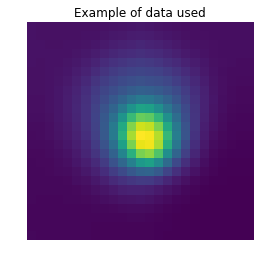

In [121]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = denoised[0]

def animate(i):
    data = denoised[i]
    return ax.imshow(data)

plt.axis("off")
plt.title("Example of data used")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(cropped.shape[0]), repeat=False)
anim.save("/tmp/3D-Data-Example.mp4")

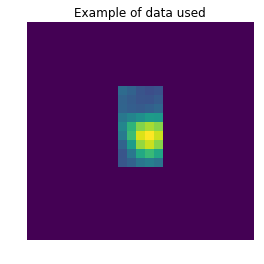

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)
data = croppednorm[0]

def animate(i):
    data = croppednorm[i]
    return ax.imshow(data)

plt.axis("off")
plt.title("Example of data used")
anim = animation.FuncAnimation(fig, animate, frames=np.arange(croppednorm.shape[0]), repeat=False)
anim.save("/tmp/3D-Data-Example1.mp4")

In [122]:
from mayavi import mlab

In [124]:
what = croppednorm
mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(what),
                            plane_orientation='x_axes',
                            slice_index=cropped.shape[0]/2,
                        )
mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(what),
                            plane_orientation='y_axes',
                            slice_index=cropped.shape[1]/2,
                        )

mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(what),
                            plane_orientation='z_axes',
                            slice_index=cropped.shape[2]/2,
                        )
mlab.axes()
mlab.show()